In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("loan.csv")
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Fill missing values in ApplicantIncome with the median
dataset["ApplicantIncome"].fillna(dataset["ApplicantIncome"].median(), inplace=True)

C:\Users\Subhan Computers\AppData\Local\Temp\ipykernel_7652\988534879.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["ApplicantIncome"].fillna(dataset["ApplicantIncome"].median(), inplace=True)


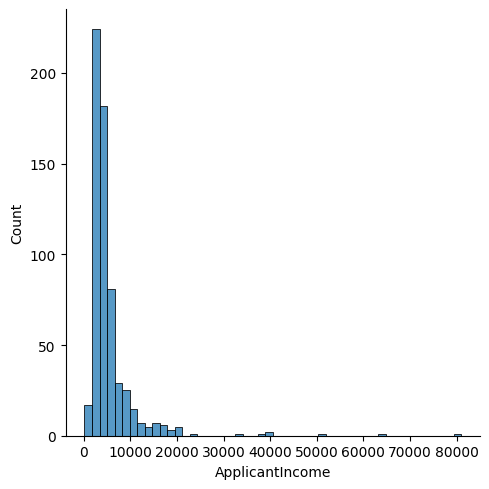

In [6]:

# Distribution plot for ApplicantIncome
sns.displot(dataset["ApplicantIncome"])
plt.show()

In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()
ss.fit(dataset[["ApplicantIncome"]])

,copy,True
,with_mean,True
,with_std,True


In [10]:
dataset["ApplicantIncome_ss"] = pd.DataFrame(ss.transform(dataset[["ApplicantIncome"]]), columns=["ApplicantIncome_ss"])

<Axes: title={'center': 'After Scaling'}, xlabel='ApplicantIncome_ss', ylabel='Count'>

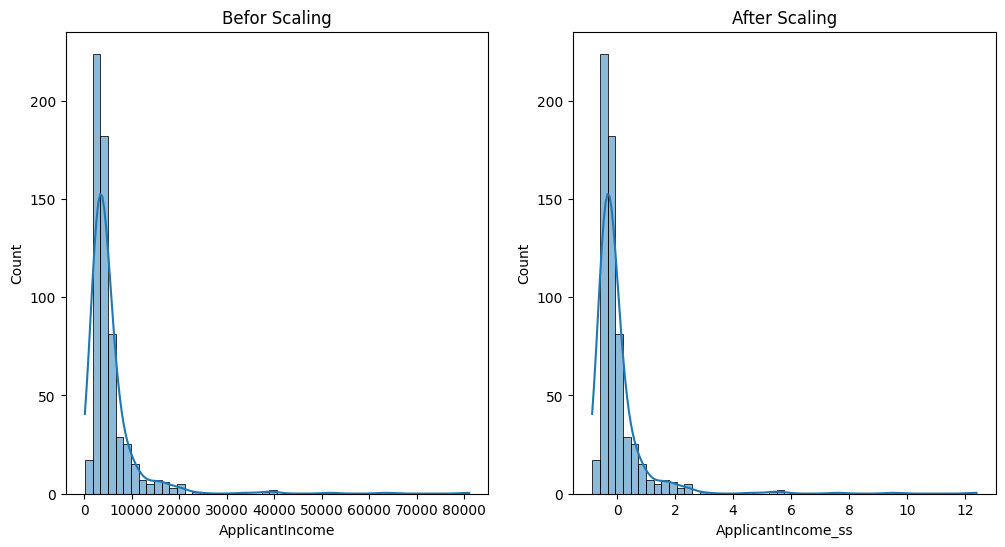

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Befor Scaling")
sns.histplot(dataset["ApplicantIncome"], kde=True)
plt.subplot(1,2,2)
plt.title("After Scaling")
sns.histplot(dataset["ApplicantIncome_ss"], kde=True)


In [12]:
# Export the processed DataFrame to CSV
dataset.to_csv("feature_scaled_dataset.csv", index=False)